# Assignment - 110065514
In this assignment, we would like to predict the success of shots made by basketball players in the NBA.

Please download dataset first. You might need to try with various models to achieve better performance.

1. The y_test is hidden this time
2. You can use any model you have learned before to achieve the best accuracy
3. Then, you need to select the best 3 features, and show the accuracy with only those

## Hint
1. You can preprocess the data to help your training
2. Since you don't have y_test this time, you may need to split a validation set for checking your performance
3. It is possible to use regression model as a classifier, for example RidgeClassifier

## Read this note carefull
* Submit to iLMS with your code file Lab05_{student_id}.ipynb (e.g. Lab05_109069999.ipynb) and prediction file y_pred.csv. The notebook should contain

1. How you evaluate your model.
2. All models you have tried and the corresponding results.
    * Logistic regression
    * Lasso
    * Ridge Classifier
    * Decision Tree
    * Random Forest
3. Plot the error curve of your best model and tell if it is over-fit or not.
4. The top-3 features you find and how you find it .
    * Selected feature: ['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']
5. A brief report what you do in this assignment.
* Deadline: 2021-10-14(Thur) 23:59.

## Reference
* Stanford CS229 Machine Learning
* NBA shot logs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # seaborn 0.9.0
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # scikit-learn 0.21.3

X = pd.read_csv('./data/X_train.csv')
y = pd.read_csv('./data/y_train.csv')

X_test = pd.read_csv('./data/X_test.csv')

In [2]:
print(X.shape)
print(X.columns)
print(y.columns)
print(X_test.shape)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
(36751, 8)


In [3]:
X.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [4]:
X.isnull().any()

PERIOD            False
GAME_CLOCK        False
SHOT_CLOCK        False
DRIBBLES          False
TOUCH_TIME        False
SHOT_DIST         False
PTS_TYPE          False
CLOSE_DEF_DIST    False
dtype: bool

In [5]:
X.describe()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
count,85751.000000,85751.000000,85751.000000,85751.000000,85751.000000,85751.000000,85751.000000,85751.000000
mean,2.472356,361.604833,12.453901,1.988140,2.746336,13.427561,2.258014,4.116967
std,1.137027,202.139084,5.750502,3.416354,2.965391,8.773229,0.437545,2.744520
min,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000
25%,1.000000,188.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,2.000000,363.000000,12.300000,1.000000,1.600000,13.300000,2.000000,3.700000
75%,3.000000,537.000000,16.600000,2.000000,3.700000,22.400000,3.000000,5.300000
max,7.000000,720.000000,24.000000,32.000000,24.900000,43.500000,3.000000,53.200000


In [6]:
y.head()

,FGM
0,0
1,1
2,1
3,1
4,1


In [3]:
# Normalize data
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_test_std = sc.fit_transform(X_test)

# Exploratory Data Analysis

Using **heat map** to see relationship between different features.

Remember to z-normalize each feature.

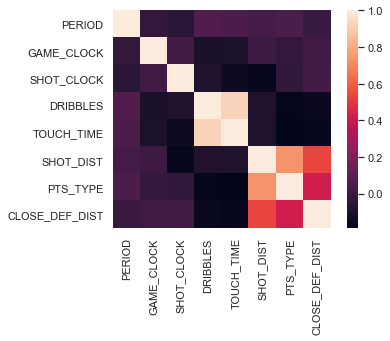

<Figure size 720x576 with 0 Axes>

In [4]:
# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / X.shape[0]

sns.set(font_scale=1.0)

ticklabels = [s for s in X.columns]

hm = sns.heatmap(
    R,
    cbar = True,
    square = True,
    yticklabels = ticklabels,
    xticklabels = ticklabels
)

plt.figure(figsize=(10, 8))
plt.tight_layout()
plt.show()

sns.reset_orig()

# Logistic Regression
## Exlpore with degree
The best degree is 2. Accuracy of validation is **0.613970.**
When the degree is about 4 or 5, the model is overfitting. Because the accuracy of validation is decreasing.

----Logistic regression----

[Degree = 1]
Accuracy train: 0.608247, valid: 0.609384

[Degree = 2]
Accuracy train: 0.616360, valid: 0.613970

[Degree = 3]
Accuracy train: 0.619425, valid: 0.613504


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[Degree = 4]
Accuracy train: 0.621991, valid: 0.611249


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[Degree = 5]
Accuracy train: 0.623174, valid: 0.609850


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[Degree = 6]
Accuracy train: 0.598717, valid: 0.591386


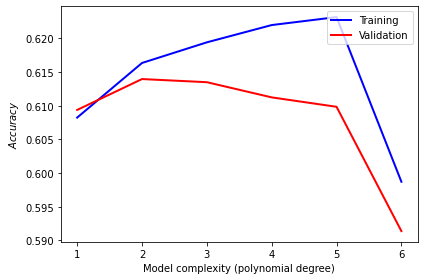

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_valid, y_train, y_valid = train_test_split(X_std, y['FGM'],
                                                      test_size=0.3, random_state=0)
acc_train = []
acc_valid = []

max_degree = 7

print('----Logistic regression----')

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    
    logistic_regr = LogisticRegression(max_iter=1000)
    logistic_regr = logistic_regr.fit(X_train_poly, y_train)
    y_train_pred = logistic_regr.predict(X_train_poly)
    y_valid_pred = logistic_regr.predict(X_valid_poly)
    
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_valid.append(accuracy_score(y_valid, y_valid_pred))
    print('\n[Degree = %d]' % d)
    print('Accuracy train: %.6f, valid: %.6f' % (
                accuracy_score(y_train, y_train_pred),
                accuracy_score(y_valid, y_valid_pred))) 

plt.plot(range(1, max_degree), acc_train, label = 'Training', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), acc_valid, label = 'Validation', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$Accuracy$')
plt.tight_layout()
plt.show()

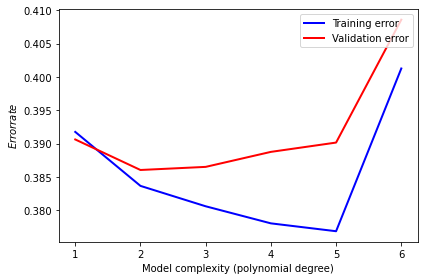

In [8]:
# Error rate
err_train = [ 1 - rate for rate in acc_train]
err_valid = [ 1 - rate for rate in acc_valid]

plt.plot(range(1, max_degree), err_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), err_valid, label = 'Validation error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$Error rate$')
plt.tight_layout()
plt.show()

## Logistic Regression try with another solver

Change the default sovler form lbfgs to sag.
But found out that it does not work better.

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y['FGM'],
                                                      test_size=0.3, random_state=0)

print('----Logistic regression----')
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

logistic_regr = LogisticRegression(max_iter=1000, solver='sag')
logistic_regr = logistic_regr.fit(X_train_poly, y_train)
y_train_pred = logistic_regr.predict(X_train_poly)
y_valid_pred = logistic_regr.predict(X_valid_poly)


acc_train.append(accuracy_score(y_train, y_train_pred))
acc_valid.append(accuracy_score(y_valid, y_valid_pred))
print('\n[Degree = %d]' % 3)
print('Accuracy train: %.6f, valid: %.6f' % (
            accuracy_score(y_train, y_train_pred),
            accuracy_score(y_valid, y_valid_pred))) 


----Logistic regression----

[Degree = 3]
Accuracy train: 0.599883, valid: 0.598344


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# Lasso

## Explore with alpha

The best alpha is 1e-3 with degree = 4.
Accuracy of validation is 0.613309.

----Lasso----


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6878.851147314649, tolerance: 1.486619002082467
  model = cd_fast.enet_coordinate_descent(



[Alpha = 0.000100]
Accuracy train: 0.621441, valid: 0.610433


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6133.219651473541, tolerance: 1.486619002082467
  model = cd_fast.enet_coordinate_descent(



[Alpha = 0.001000]
Accuracy train: 0.619992, valid: 0.613309


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5961.391989938643, tolerance: 1.486619002082467
  model = cd_fast.enet_coordinate_descent(



[Alpha = 0.010000]
Accuracy train: 0.616010, valid: 0.610122

[Alpha = 0.100000]
Accuracy train: 0.556418, valid: 0.548939

[Alpha = 1.000000]
Accuracy train: 0.548655, valid: 0.541903


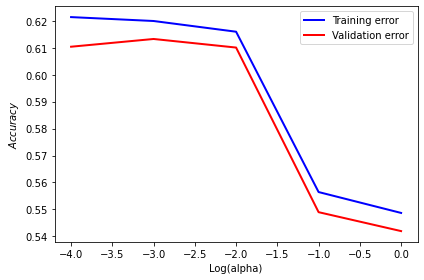

In [9]:
from sklearn.linear_model import Lasso

X_train, X_valid, y_train, y_valid = train_test_split(X_std, y['FGM'],
                                                      test_size=0.3, random_state=0)
acc_train = []
acc_valid = []

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

print('----Lasso----')
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1]
for a in alphas:
    lasso_regr = Lasso(alpha=a)
    lasso_regr = lasso_regr.fit(X_train_poly, y_train)
    y_train_pred = lasso_regr.predict(X_train_poly)
    y_valid_pred = lasso_regr.predict(X_valid_poly)
    
    mask = y_train_pred < 0.5
    y_train_pred[mask] = 0
    y_train_pred[~mask] = 1
    
    mask = y_valid_pred < 0.5
    y_valid_pred[mask] = 0
    y_valid_pred[~mask] = 1
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_valid.append(accuracy_score(y_valid, y_valid_pred))
    print('\n[Alpha = %.6f]' % a)
    print('Accuracy train: %.6f, valid: %.6f' % (
                accuracy_score(y_train, y_train_pred),
                accuracy_score(y_valid, y_valid_pred))) 

plt.plot(np.log10(alphas), acc_train, label = 'Training', color = 'blue', linewidth = 2)
plt.plot(np.log10(alphas), acc_valid, label = 'Validation', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Log(alpha)')
plt.ylabel('$Accuracy$')
plt.tight_layout()
plt.show()

## Explore with degree

The best degree is 3 with alpha = 0.001.
Accuracy of validation is 0.614204.

In [11]:
from sklearn.linear_model import Lasso

X_train, X_valid, y_train, y_valid = train_test_split(X_std, y['FGM'],
                                                      test_size=0.3, random_state=0)
acc_train = []
acc_valid = []

max_degree = 7
best_alpha = 0.001

print('----Lasso----')
for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    
    lasso_regr = Lasso(alpha=best_alpha)
    lasso_regr = lasso_regr.fit(X_train_poly, y_train)
    y_train_pred = lasso_regr.predict(X_train_poly)
    y_valid_pred = lasso_regr.predict(X_valid_poly)
    
    mask = y_train_pred < 0.5
    y_train_pred[mask] = 0
    y_train_pred[~mask] = 1
    
    mask = y_valid_pred < 0.5
    y_valid_pred[mask] = 0
    y_valid_pred[~mask] = 1
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_valid.append(accuracy_score(y_valid, y_valid_pred))
    print('\n[Degree = %d]' % d)
    print('Accuracy train: %.6f, valid: %.6f' % (
                accuracy_score(y_train, y_train_pred),
                accuracy_score(y_valid, y_valid_pred))) 


----Lasso----

[Degree = 1]
Accuracy train: 0.608180, valid: 0.609500

[Degree = 2]
Accuracy train: 0.617376, valid: 0.612960

[Degree = 3]
Accuracy train: 0.618726, valid: 0.614204


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6133.219651473541, tolerance: 1.486619002082467
  model = cd_fast.enet_coordinate_descent(



[Degree = 4]
Accuracy train: 0.619992, valid: 0.613309


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6909.143654066604, tolerance: 1.486619002082467
  model = cd_fast.enet_coordinate_descent(



[Degree = 5]
Accuracy train: 0.622541, valid: 0.611366


C:\Users\ginag\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6882.285863558283, tolerance: 1.486619002082467
  model = cd_fast.enet_coordinate_descent(



[Degree = 6]
Accuracy train: 0.625173, valid: 0.610278


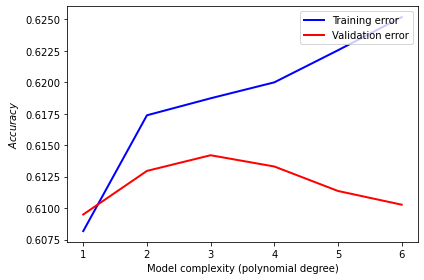

In [26]:
plt.plot(range(1, max_degree), acc_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), acc_valid, label = 'Validation error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$Accuracy$')
plt.tight_layout()
#plt.savefig('./output/Lab05-fig-error-curve.png', dpi=300)
plt.show()

# Select the top 3 features

Selected feature: ['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']

In [28]:
from sklearn.feature_selection import SelectFromModel

# using L1-based feature selection
logistic_regr = LogisticRegression(max_iter=400).fit(X_std, y['FGM'])
print("Before:", X_std.shape, end = "\n\n")

model = SelectFromModel(logistic_regr, prefit=True)
X_new = model.transform(X_std)

feature_idx = model.get_support()
feature_name = X.columns[feature_idx]
print("Selected feature:", feature_name, end="\n\n")
print("After:", X_new.shape)

Before: (85751, 8)

Selected feature: Index(['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST'], dtype='object')

After: (85751, 3)


## Logistic regression try with selected feature

not better than the original.

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y['FGM'],
                                                      test_size=0.3, random_state=0)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

logistic_regr = LogisticRegression(max_iter=1000)
logistic_regr = logistic_regr.fit(X_train_poly, y_train)
y_train_pred = logistic_regr.predict(X_train_poly)
y_valid_pred = logistic_regr.predict(X_valid_poly)

acc_train.append(accuracy_score(y_train, y_train_pred))
acc_valid.append(accuracy_score(y_valid, y_valid_pred))
print('Accuracy train: %.6f, valid: %.6f' % (
            accuracy_score(y_train, y_train_pred),
            accuracy_score(y_valid, y_valid_pred))) 

Accuracy train: 0.617643, valid: 0.612027


# Ridge Classifier

In [29]:
# Try with Ridge Regression
from sklearn.linear_model import RidgeClassifier

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_new)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_poly, y['FGM'], test_size=0.3, random_state=0)

clf = RidgeClassifier(alpha=best_alpha)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)

print('Accuracy score train: %.6f, valid: %.6f' % (
                accuracy_score(y_train, y_train_pred),
                accuracy_score(y_valid, y_valid_pred)))  
print("confusion matrix of validation:")
print(confusion_matrix(y_valid, y_valid_pred))

Accuracy score train: 0.617593, valid: 0.611716
confusion matrix of validation:
[[11485  2444]
 [ 7545  4252]]


In [16]:
# Try with Ridge Regression with select feature
from sklearn.linear_model import RidgeClassifier

for d in [2, 3, 4]:
    print("\n[Degree = %d]" % d)
    
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_std)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y['FGM'], test_size=0.3, random_state=0)

    for a in [1e-2, 1e-1, 1, 10]:

        clf = RidgeClassifier(alpha=a)
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_valid_pred = clf.predict(X_valid)

        print('\n[Alpha = %.6f]' % a )
        print('Accuracy train: %.6f, valid: %.6f' % (
                        accuracy_score(y_train, y_train_pred),
                        accuracy_score(y_valid, y_valid_pred)))  
        print("confusion matrix of validation:")
        print(confusion_matrix(y_valid, y_valid_pred))


[Degree = 2]

[Alpha = 0.010000]
Accuracy train: 0.617693, valid: 0.614903
confusion matrix of validation:
[[11232  2697]
 [ 7210  4587]]

[Alpha = 0.100000]
Accuracy train: 0.617693, valid: 0.614903
confusion matrix of validation:
[[11232  2697]
 [ 7210  4587]]

[Alpha = 1.000000]
Accuracy train: 0.617693, valid: 0.614942
confusion matrix of validation:
[[11232  2697]
 [ 7209  4588]]

[Alpha = 10.000000]
Accuracy train: 0.617776, valid: 0.614903
confusion matrix of validation:
[[11231  2698]
 [ 7209  4588]]

[Degree = 3]

[Alpha = 0.010000]
Accuracy train: 0.618892, valid: 0.613698
confusion matrix of validation:
[[11401  2528]
 [ 7410  4387]]

[Alpha = 0.100000]
Accuracy train: 0.618892, valid: 0.613698
confusion matrix of validation:
[[11401  2528]
 [ 7410  4387]]

[Alpha = 1.000000]
Accuracy train: 0.618875, valid: 0.613698
confusion matrix of validation:
[[11401  2528]
 [ 7410  4387]]

[Alpha = 10.000000]
Accuracy train: 0.618859, valid: 0.613854
confusion matrix of validation:
[

## Choose Ridge Classifier to be the selected model with degree = 3 and alpha = 1

In [33]:
# Output the best predict

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)
X_test_poly = poly.fit_transform(X_test_std)

clf = RidgeClassifier(alpha=1)
clf.fit(X_poly, y)

y_pred = clf.predict(X_poly)
y_test_pred = clf.predict(X_test_poly)

# output the result
pd.DataFrame(y_test_pred).to_csv('y_pred.csv')

print('\n[Alpha = %.6f] // [Degree = %d]' % (1, 2))
print('Accuracy train: %.6f' % (
                accuracy_score(y, y_pred)))  
print("\nconfusion matrix of validation:")
print(confusion_matrix(y_valid, y_valid_pred))

C:\Users\ginag\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[Alpha = 1.000000] // [Degree = 2]
Accuracy train: 0.617311

confusion matrix of validation:
[[11232  2697]
 [ 7209  4588]]


# Decision Tree with different depth

Accuracy of validation is **0.611249.**
Best depth of tree is 5 with selected feature.

In [51]:
from sklearn.tree import DecisionTreeClassifier

depth = 10

acc_train = []
acc_valid = []

# without z-normalize
X_train, X_valid, y_train, y_valid = train_test_split(X[feature_name], y['FGM'],
                                                      test_size=0.3, random_state=0)
for d in range(1, depth): 
    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=d, 
                                  random_state=0)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_valid_pred = tree.predict(X_valid)
        
    print('Max depth: %d' % d)
    print('Training Accuracy: %.6f' % accuracy_score(y_train, y_train_pred))
    print('Validation Accuracy: %.6f\n' % accuracy_score(y_valid, y_valid_pred))
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_valid.append(accuracy_score(y_valid, y_valid_pred))

Max depth: 1
Training Accuracy: 0.610212
Validation Accuracy: 0.604330

Max depth: 2
Training Accuracy: 0.610212
Validation Accuracy: 0.604330

Max depth: 3
Training Accuracy: 0.610262
Validation Accuracy: 0.605652

Max depth: 4
Training Accuracy: 0.617693
Validation Accuracy: 0.610899

Max depth: 5
Training Accuracy: 0.618776
Validation Accuracy: 0.611249

Max depth: 6
Training Accuracy: 0.620908
Validation Accuracy: 0.611055

Max depth: 7
Training Accuracy: 0.625106
Validation Accuracy: 0.609656

Max depth: 8
Training Accuracy: 0.628505
Validation Accuracy: 0.610433

Max depth: 9
Training Accuracy: 0.631703
Validation Accuracy: 0.607129



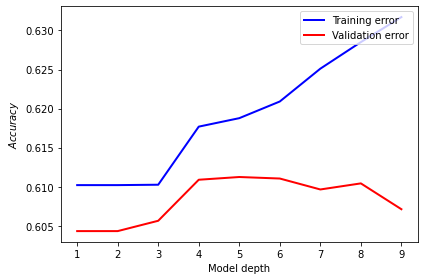

In [52]:
plt.plot(range(1, depth), acc_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, depth), acc_valid, label = 'Validation error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model depth')
plt.ylabel('$Accuracy$')
plt.tight_layout()
plt.show()

# Random Forests Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y['FGM'], test_size=0.3, random_state=0)

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                max_depth=7,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_valid)
y_train_pred = forest.predict(X_train)
print('Train Accuracy: %.6f' % accuracy_score(y_train, y_train_pred))
print('Validation Accuracy: %.6f' % accuracy_score(y_valid, y_pred))


Train Accuracy: 0.624490
Validation Accuracy: 0.614242


# Result

其實這次Train完還蠻沮喪的，因為不管怎麼調動，好像predict完的結果都沒有太大的變化，然後其實我也有試過去preprocess data，例如：將SHOT_DIST重新分成十等分，但是後來Train完的結果比沒有preprocess前還糟糕，所以就沒有使用在後來的預測上，然後也有測過之前課堂所教過的model。

**Random Forest vs. Decision Tree**
原本沒有調整Random Forest的max_depth之前，Random Forest的預測結果是比單顆樹還低的，這點原本讓我很訝異，所以想了一下加上max_depth之後，Random Forest還是比單顆樹還高的，設定max_depth為7，因為default是會跑到min_samples_split=2，代表直到leaf剩下兩個為止，都是會一直分下去的，可能會導致overfit。

**Ridge / Logistic Regression / Lasso**
原本是想要使用Logistic去實作L1-norm的Classifier，但是因為model需要跑太久，所以後來沒有實做logistic regression + L1 norm，還有這部分需要去看document連帶去調整solver，其實原本Logistic defualt就是使用L2-norm，可以看到最好的Ridge結果其實跟Logistic沒有差太多，都是0.614左右。

**如果有時間會想要嘗試的：**
XGBOOST，因為看了TA所給的Reference，發現最佳的預測結果也是0.68，可以說NBA球員還是很難預測的哈哈～